In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#using pandas to read the data 
loans=pd.read_csv('loan_data.csv')

In [3]:
#cheking out the head,info and description of our data 
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [6]:
# Exploratory Data Analysis

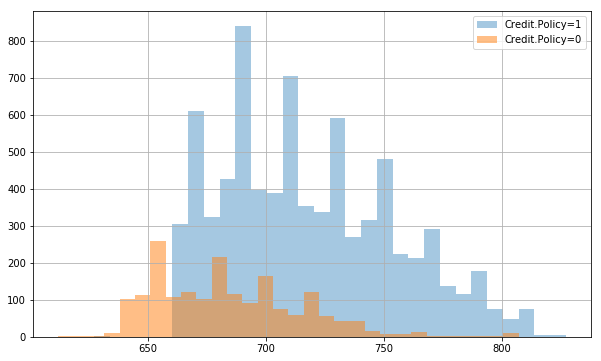

In [7]:
#Creating a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.
fig,axes=plt.subplots(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.4,bins=30,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,bins=30,label='Credit.Policy=0')
plt.legend()

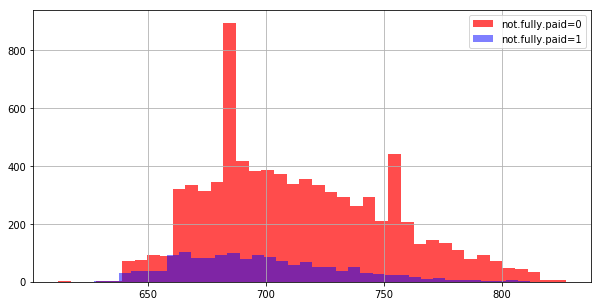

In [9]:

fig,axes=plt.subplots(figsize=(10,5))
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.7,bins=40,label='not.fully.paid=0',color='red')
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,bins=40,label='not.fully.paid=1',color='blue')
plt.legend()

In [11]:
#Creating a countplot using seaborn showing the counts of loans by purpose, with the color hue defined
#by not.fully.paid.

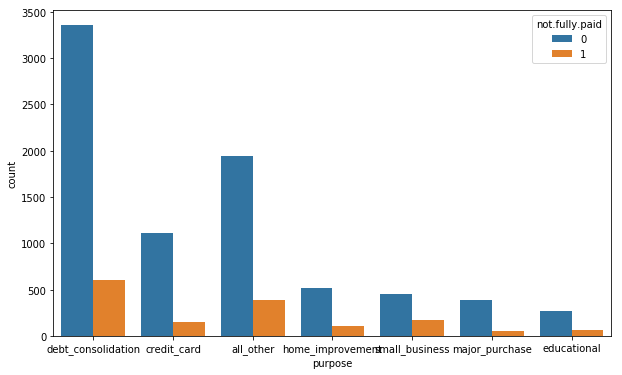

In [12]:
fig,axes=plt.subplots(figsize=(10,6))
sns.countplot('purpose',hue='not.fully.paid',data=loans)

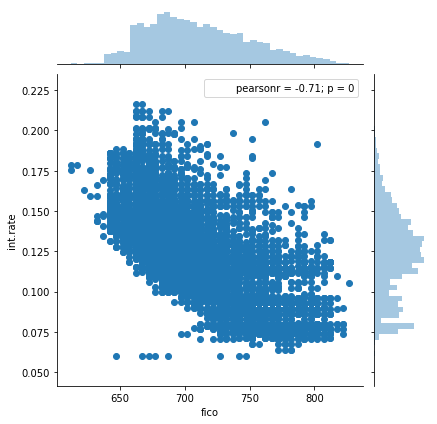

In [13]:
#creating a jointplot between FICO score and interest rate
sns.jointplot(x='fico',y='int.rate',data=loans)

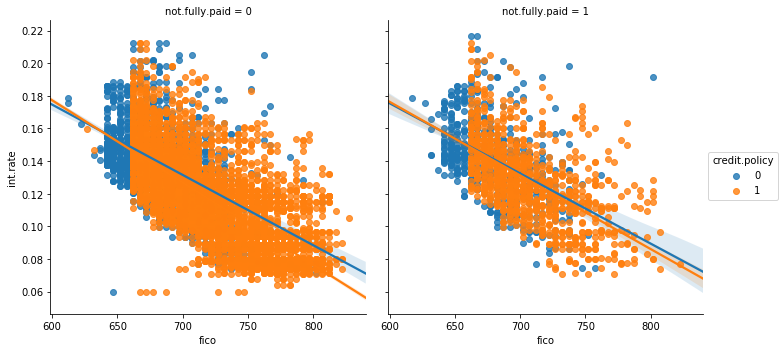

In [14]:
#Creating the following lmplots to see if the trend differed between not.fully.paid and credit.policy
sns.lmplot(x='fico',y='int.rate',col='not.fully.paid',data=loans,hue='credit.policy')


In [15]:
#setting up the data

In [17]:
#categorical features
#converting the categorical features into dummy variables using 
#pd.getdummies()
cat_feats = ['purpose']
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)
final_data.head(2)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0


In [18]:
#Train test split

In [19]:
#using sklearn spilting the data into training set and testing set

In [20]:
from sklearn.cross_validation import train_test_split

C:\Users\Vishal\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
X=final_data.drop('not.fully.paid',axis=1)
y=final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

Traing A Decision Tree Model

In [23]:
#Importing Decision Tree Classifier

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
tree=DecisionTreeClassifier()

In [26]:
#fittimg our training data to our model
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Predictions and Evaluation of Decision Tree
**Creating predictions from the test set and creating a classification report and a confusion matrix.**

In [27]:
#Creating Predictions

In [28]:
predictions=tree.predict(X_test)


In [29]:
#importing classification report and confusion matrix from sklearn
from sklearn.metrics import classification_report,confusion_matrix

In [31]:
#Printing the classification report and confusio matrix
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

             precision    recall  f1-score   support

          0       0.85      0.83      0.84      2431
          1       0.18      0.21      0.20       443

avg / total       0.75      0.73      0.74      2874



[[2015  416]
 [ 349   94]]


## Training the Random Forest model


In [32]:
#importing random forest tree from sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier

In [33]:
rfc=RandomForestClassifier(n_estimators=200)

In [34]:
#fitting the data to our model
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [35]:
#making predictions from our model
rfc_pred=rfc.predict(X_test)

In [36]:
#Printing the classification report and confusio matrix

In [37]:
print(classification_report(y_test,rfc_pred))
print('\n')
print(confusion_matrix(y_test,rfc_pred))

             precision    recall  f1-score   support

          0       0.85      1.00      0.92      2431
          1       0.59      0.02      0.04       443

avg / total       0.81      0.85      0.78      2874



[[2424    7]
 [ 433   10]]
